In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from IPython.display import display

In [191]:
# Define colors
GRAY = ['#231F20', '#393536', '#4f4c4d', '#656263', '#7b7979', '#918f90', '#a7a5a6', '#bdbcbc', '#d3d2d2', '#e9e9e9']
BLUE = ['#174b7e','#2e5d8b', '#456f98', '#5d81a5', '#7493b2', '#8ba5bf', '#a2b7cb', '#b9c9d8', '#d1dbe5', '#e8edf2']
RED = ['#C3514E', '#E6BAB7']
GREEN = ['#0C8040', '#9ABB59']
ORANGE = ['#F79747']

# Configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'

#sns.palplot(sns.color_palette(GRAY))
#sns.palplot(sns.color_palette(BLUE))
#sns.palplot(sns.color_palette(RED))
#sns.palplot(sns.color_palette(ORANGE))
#sns.palplot(sns.color_palette(GREEN))

In [192]:
# Read in dataset
data = pd.read_csv('../datasets/co2_emissions_kt_by_country.csv')

display(data)

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


In [193]:
emissions_of_germany = data[data.country_name == "Germany"]
reduction_target_by_2030 = emissions_of_germany.iloc[0]["value"] * 0.65

display(emissions_of_germany)

,country_code,country_name,year,value
2912,DEU,Germany,1990,955310.000000
2913,DEU,Germany,1991,932550.000000
2914,DEU,Germany,1992,892820.000000
2915,DEU,Germany,1993,887060.000000
2916,DEU,Germany,1994,875900.000000
2917,DEU,Germany,1995,874660.000000
2918,DEU,Germany,1996,904340.000000
2919,DEU,Germany,1997,872650.000000
2920,DEU,Germany,1998,865250.000000
2921,DEU,Germany,1999,833590.000000


In [194]:
# Predict values from 1990 to 2050 using linear regression

X = emissions_of_germany.iloc[:, 2].to_numpy().reshape(-1, 1)
Y = emissions_of_germany.iloc[:, 3].to_numpy().reshape(-1, 1)

linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 

X_pred = np.append(X, np.arange(2020, 2051, 1)).reshape(-1, 1)
Y_pred = linear_regressor.predict(X_pred)

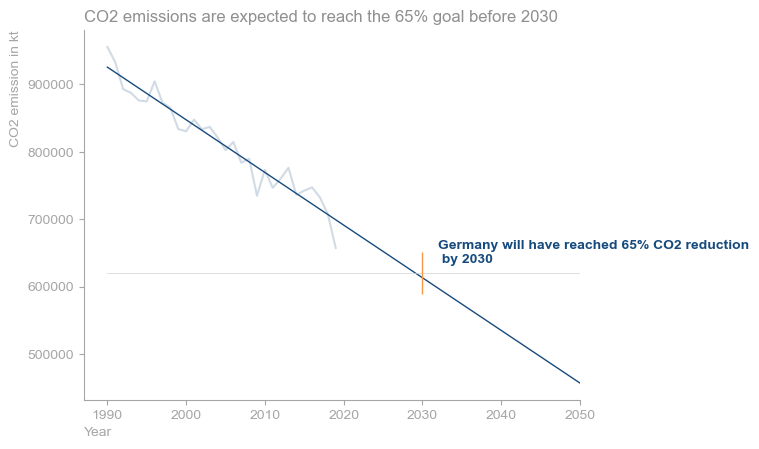

In [201]:
# Plot germany's CO2 emissions trendline

ax = emissions_of_germany.plot(x = "year", y = "value", legend=None, color=BLUE[8])
fig = ax.get_figure()

ax.set_title('CO2 emissions are expected to reach the 65% goal before 2030', loc="left", color=GRAY[5])

ax.plot(X_pred, Y_pred,color=BLUE[0], linewidth=1)

markers_on = [40]
ax.plot(np.arange(1990, 2051, 1), np.full(61, reduction_target_by_2030), linewidth=0.5, color=GRAY[8], 
        markevery=markers_on, marker='|', markeredgecolor=ORANGE[0], markersize=30)

ax.annotate("Germany will have reached 65% CO2 reduction\n by 2030", xy=(2032, reduction_target_by_2030 + 15000), xycoords='data', color=BLUE[0], weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(GRAY[6])
ax.spines['left'].set_color(GRAY[6])

ax.tick_params(axis='x', colors=GRAY[6], which='both')
ax.tick_params(axis='y', colors=GRAY[6], which='both')

ax.set_ylabel('CO2 emission in kt', loc='top', color=GRAY[6])
ax.set_xlabel('Year', loc='left', color=GRAY[6])

ax.set_xlim(xmax=2050)

plt.show()

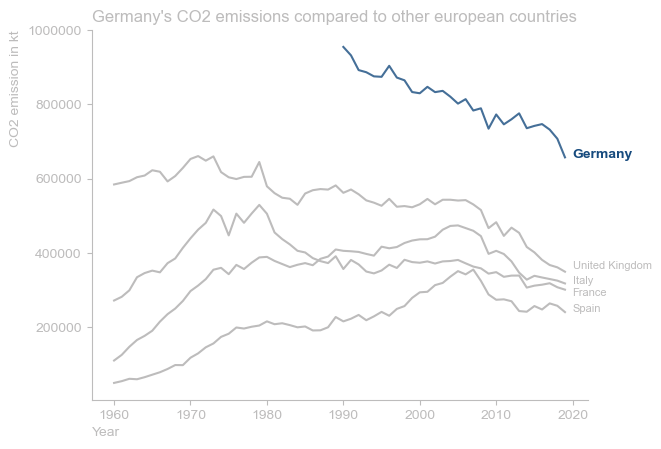

In [200]:
# Plot germany's CO2 emissions compared to other european countries

emissions_of_france = data[data.country_name == "France"]
emissions_of_italy = data[data.country_name == "Italy"]
emissions_of_uk = data[data.country_name == "United Kingdom"]
emissions_of_spain = data[data.country_name == "Spain"]

ax = plt.subplot()

ax.plot(emissions_of_germany['year'], emissions_of_germany['value'], color=BLUE[2])
ax.plot(emissions_of_france['year'], emissions_of_france['value'], color=GRAY[7])
ax.plot(emissions_of_italy['year'], emissions_of_italy['value'], color=GRAY[7])
ax.plot(emissions_of_uk['year'], emissions_of_uk['value'], color=GRAY[7])
ax.plot(emissions_of_spain['year'], emissions_of_spain['value'], color=GRAY[7])

ax.set_title("Germany's CO2 emissions compared to other european countries", loc="left", color=GRAY[7])

ax.ticklabel_format(useOffset=False, style='plain', axis='y')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(GRAY[7])
ax.spines['left'].set_color(GRAY[7])

ax.tick_params(axis='x', colors=GRAY[7], which='both')
ax.tick_params(axis='y', colors=GRAY[7], which='both')

ax.set_ylabel('CO2 emission in kt', loc='top', color=GRAY[7])
ax.set_xlabel('Year', loc='left', color=GRAY[7])

ax.annotate("Germany", xy=(2020, emissions_of_germany.iloc[-1]['value']), xycoords='data', color=BLUE[0], weight='bold')
ax.annotate("France", xy=(2020, emissions_of_france.iloc[-1]['value'] * 0.95), xycoords='data', color=GRAY[7], size=8)
ax.annotate("Italy", xy=(2020, emissions_of_italy.iloc[-1]['value'] * 1.), xycoords='data', color=GRAY[7], size=8)
ax.annotate("United Kingdom", xy=(2020, emissions_of_uk.iloc[-1]['value'] * 1.02), xycoords='data', color=GRAY[7], size=8)
ax.annotate("Spain", xy=(2020, emissions_of_spain.iloc[-1]['value']), xycoords='data', color=GRAY[7], size=8)

plt.show()